In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6 ##

### Census ###

In [7]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [8]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [9]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [10]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


### Line Plots ###

In [11]:
no_999 = simple.where('AGE', are.below(999))

In [12]:
everyone = no_999.where('SEX', 0).drop('SEX')

In [13]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


US Population


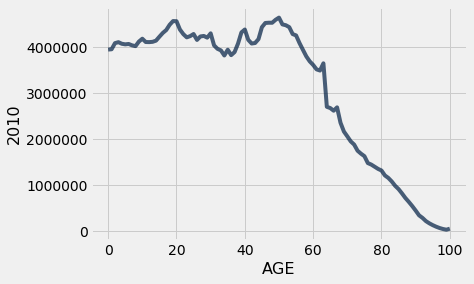

In [14]:
everyone.plot('AGE', '2010') # US Population, by age
print("US Population")

In [15]:
everyone.where('AGE', are.between(60,71))

AGE,2010,2014
60,3616733,3985367
61,3520121,3834428
62,3495073,3685822
63,3652174,3572379
64,2706063,3488136
65,2678532,3384449
66,2621346,3347776
67,2693709,3485502
68,2359819,2572527
69,2167833,2535012


In [16]:
2010 - 63

1947

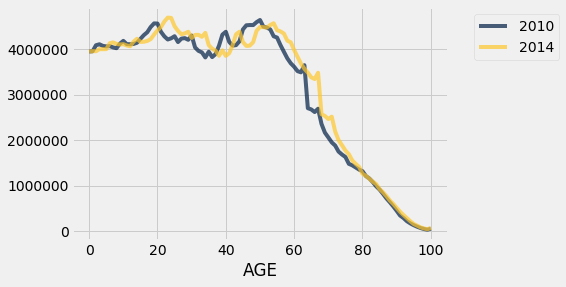

In [17]:
everyone.plot('AGE')

In [40]:
tbl = Table()
tbl = tbl.with_columns(
    'M pop', no_999.where('SEX', 1).column('2014'),
    'F pop', no_999.where('SEX', 2).column('2014'),
    'AGE', np.arange(0, 101)
)

In [41]:
tbl

M pop,F pop,AGE
2017857,1930493,0
2023253,1938870,1
2022502,1935270,2
2048618,1956572,3
2043498,1959950,4
2043467,1961391,5
2110328,2024024,6
2122240,2031760,7
2105122,2014402,8
2097272,2009560,9


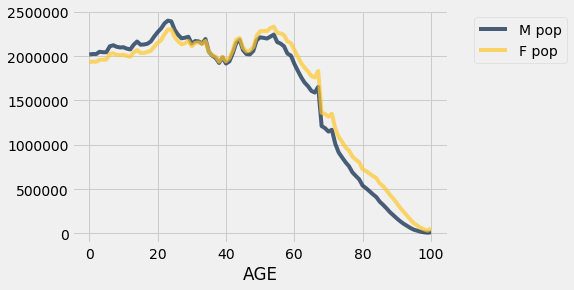

In [42]:
tbl.plot('AGE')

### Scatter Plots ###

In [44]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


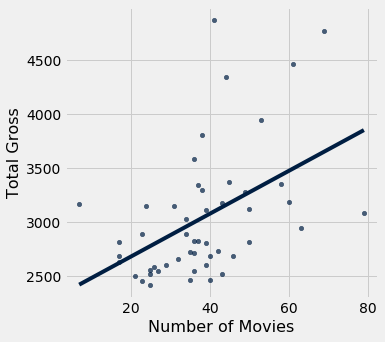

In [45]:
actors.scatter('Number of Movies',"Total Gross", fit_line=True)

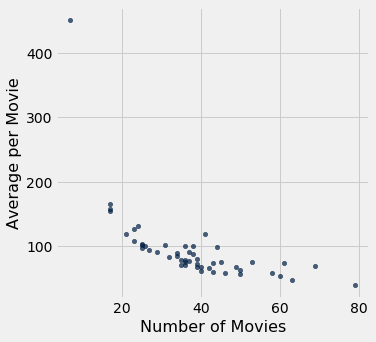

In [48]:
actors.scatter('Number of Movies', 'Average per Movie')

In [47]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


### Bar Charts ###

In [23]:
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


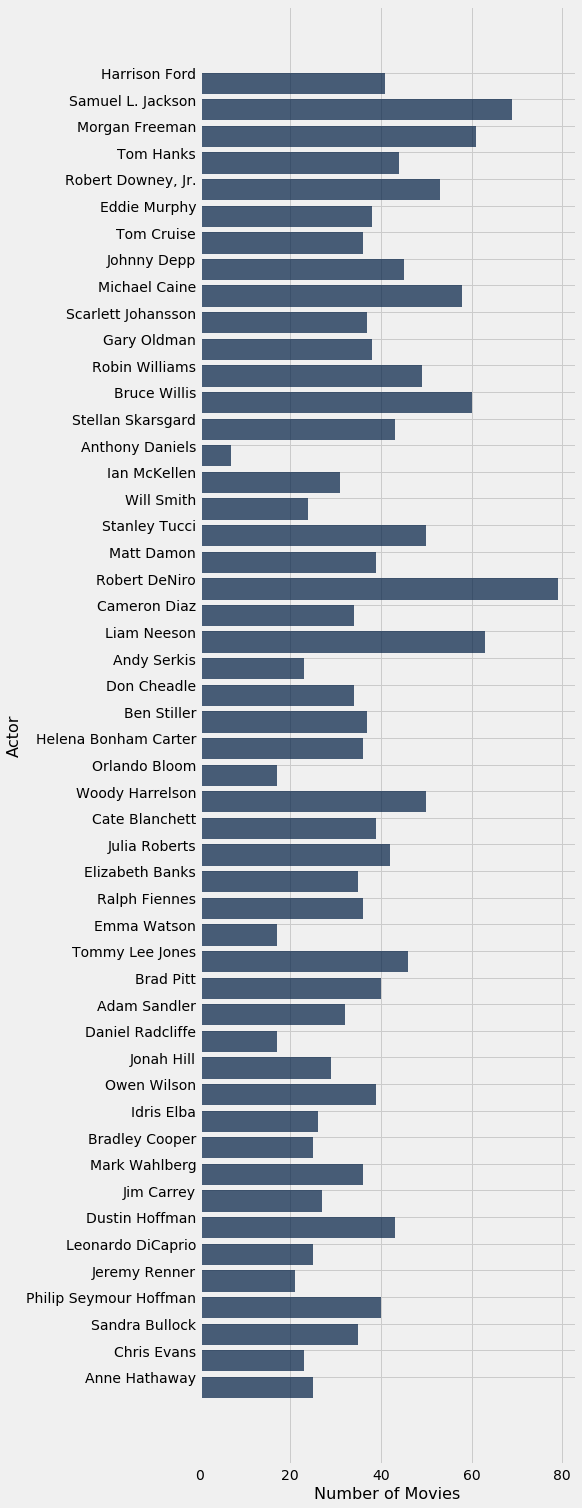

In [22]:
# only looking at one variable
actors.barh('Actor', 'Number of Movies')

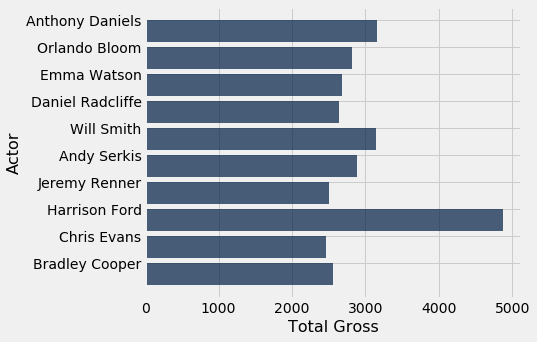

In [24]:
actors.sort('Average per Movie', descending = True).take(np.arange(10)).barh('Actor', 'Total Gross')


### Distributions of Categorical Variables ###

In [25]:
survey = Table().read_table('survey_fun.csv')
survey = survey.relabeled('In what year are you in your cumulative undergraduate studies?',
                         'Year in Undergrad')\
                .relabeled('In what year are you in your cumulative time at UC Berkeley?',
                            'Year at Cal')\
                .relabeled('Do you consider yourself an introvert or extrovert?',
                          'Extroversion Rating')\
                .relabeled('How many different people do you text (or any other forms of direct messaging) per day on average?',
                          'People Texted Per Day')\
                .relabeled('On average, how many hours of sleep do you get each night?',
                          'Hours of Sleep')\
                .relabeled('Are you left-handed or right-handed?', 'Handedness')\
                .relabeled('Which leg do you put in first when putting on pants?', 'Pants Leg Preference')
survey

Year in Undergrad,Year at Cal,Extroversion Rating,People Texted Per Day,Hours of Sleep,Handedness,Pants Leg Preference
Fifth or above,Third,4,2,8,Right-handed,Left leg in first
First,First,4,4,6,Right-handed,Right leg in first
Second,Second,8,8,7,Right-handed,Left leg in first
Fourth,Fourth,nan,nan,nan,nan,nan
Fourth,Fourth,5,nan,6,Right-handed,I don't know
Not an undergrad,First,8,20,6,Right-handed,Right leg in first
Third,Fourth,6,2,6,Right-handed,Right leg in first
Not an undergrad,First,6,4,8,Right-handed,Right leg in first
Second,nan,nan,nan,nan,nan,nan
Not an undergrad,First,4,1,7,Right-handed,I don't know


In [27]:
survey.select('Year in Undergrad').sort('Year in Undergrad')

Year in Undergrad
Fifth or above
Fifth or above
Fifth or above
Fifth or above
Fifth or above
Fifth or above
Fifth or above
First
First
First


In [28]:
year_distribution = survey.group('Year in Undergrad')
year_distribution

Year in Undergrad,count
Fifth or above,7
First,24
Fourth,59
Not an undergrad,25
Second,83
Third,76
nan,4


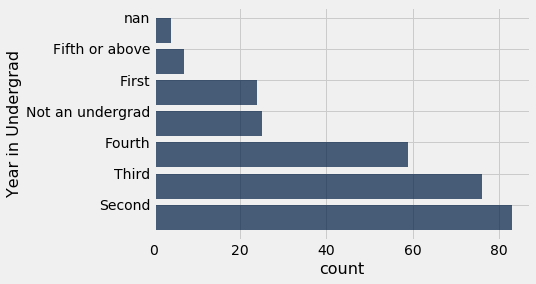

In [30]:
year_distribution.sort('count').barh('Year in Undergrad')

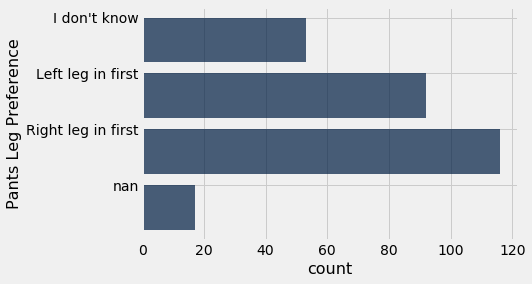

In [34]:
survey.group('Pants Leg Preference').barh('Pants Leg Preference')